# MNIST

In [2]:
from mlxtend.data import loadlocal_mnist
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn import metrics

## Loading the data

In [14]:
# Data paths
Train_images = "C:\\Users\\Naeem Cho\\Desktop\\School Work\\Machine_Learning\\datasets\\train-images.idx3-ubyte"
Train_labels = "C:\\Users\\Naeem Cho\\Desktop\\School Work\\Machine_Learning\\datasets\\train-labels.idx1-ubyte"

Test_images = "C:\\Users\\Naeem Cho\\Desktop\\School Work\\Machine_Learning\\datasets\\t10k-images.idx3-ubyte"
Test_labels = "C:\\Users\\Naeem Cho\\Desktop\\School Work\\Machine_Learning\\datasets\\t10k-labels.idx1-ubyte"

## Splitting the Data into Training and Test Sets

In [16]:
# Reading data

train_img, train_lbl = loadlocal_mnist(images_path = Train_images, labels_path=Train_labels)
test_img, test_lbl = loadlocal_mnist(images_path = Test_images, labels_path = Test_labels)

## Showing the Images and Labels

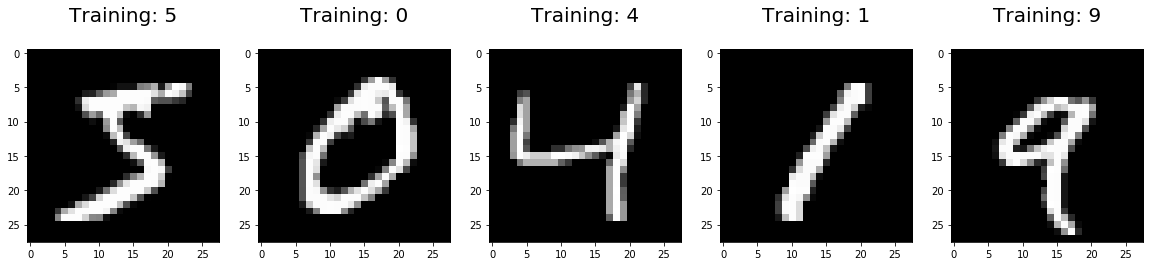

In [17]:
# Showing images and labels

plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(train_img[0:5], train_lbl[0:5])):
 plt.subplot(1, 5, index + 1)
 plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
 plt.title('Training: %i\n' % label, fontsize = 20)

## scikit-learn 4-step Modeling Pattern

In [ ]:
# Making an instance of the model
logisticRegr = LogisticRegression(solver = 'lbfgs')

In [ ]:
logisticRegr.fit(train_img, train_lbl)

In [ ]:
# Predict for one observation (image)
logisticRegr.predict(test_img[0].reshape(1,-1))

In [ ]:
# Predict for multiple observations
logisticRegr.predict(test_img[0:10])

In [ ]:
# Make predictions on entire test data
predictions = logisticRegr.predict(test_img)

## Measuring Model Performance

Accuracy is defined as:

fraction of correct predictions = correct predictions/ total number of data points

In [26]:
score = logisticRegr.score(test_img, test_lbl)
print(score)

0.9178


## Display Misclassified images with Predicted Labels

Get the indices of the misclassified images

In [32]:
index = 0
misclassifiedIndexes = []
for label, predict in zip(test_lbl, predictions):
 if label != predict: 
  misclassifiedIndexes.append(index)
  index +=1

The following code should show misclassified images, however due to an error in code, its showing properly classified images.

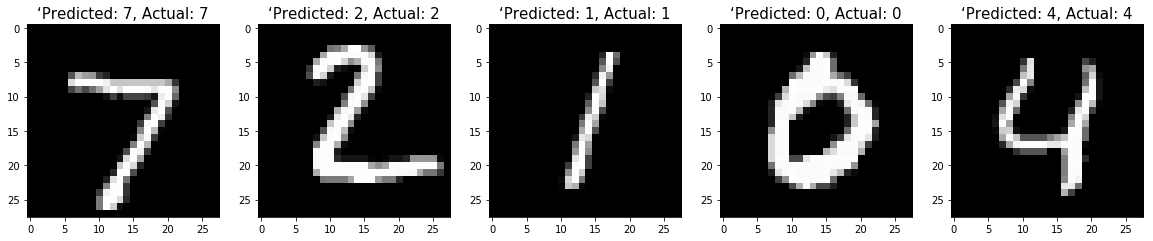

In [33]:
plt.figure(figsize=(20,4))
for plotIndex, badIndex in enumerate(misclassifiedIndexes[0:5]):
 plt.subplot(1, 5, plotIndex + 1)
 plt.imshow(np.reshape(test_img[badIndex], (28,28)), cmap=plt.cm.gray)
 plt.title('‘Predicted: {}, Actual: {}'.format(predictions[badIndex], test_lbl[badIndex]), fontsize = 15)

The chunk below fixes the issue by pulling the incrementation out of the if statement.

In [34]:
index = 0
misclassifiedIndexes = []
for label, predict in zip(test_lbl, predictions):
    if label != predict: 
        misclassifiedIndexes.append(index)
    index +=1

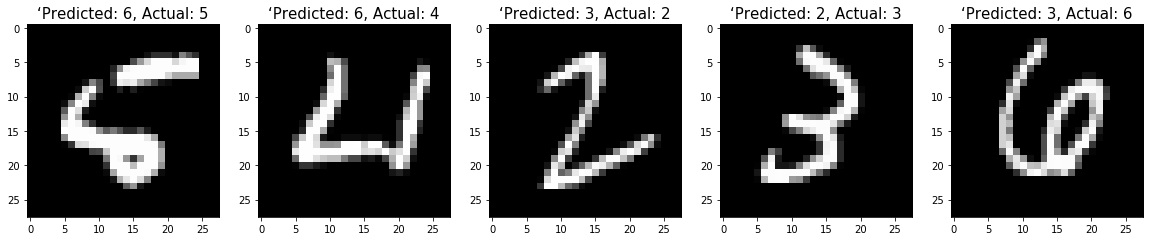

In [35]:
plt.figure(figsize=(20,4))
for plotIndex, badIndex in enumerate(misclassifiedIndexes[0:5]):
 plt.subplot(1, 5, plotIndex + 1)
 plt.imshow(np.reshape(test_img[badIndex], (28,28)), cmap=plt.cm.gray)
 plt.title('‘Predicted: {}, Actual: {}'.format(predictions[badIndex], test_lbl[badIndex]), fontsize = 15)

## Confusion matrix

In [ ]:
cm = metrics.confusion_matrix(test_lbl, predictions)
print(cm)

In [ ]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True,
           cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);